In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

In [2]:
df = pd.read_csv("~/data/TrainingValidationData_320k_vs_80k_shuffle.csv", header = None, sep='\n')
df = df[0].str.split(';|,', expand=True)

In [3]:
df = df.fillna(0)

In [4]:
n_obj = (len(df.columns) - 5) // 5       
print("n_obj =", n_obj)
df = df.drop(range(5 + 5 * n_obj, len(df.columns)), axis = 'columns') # Drop the empty column at the end

n_obj = 19


In [5]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')

In [6]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,21,ttbar,1,19592.4,-0.0410686,b,431384,247371,-1.15222,1.84686,...,0,0,0,0,0,0,0,0,0,0
1,21,ttbar,1,34361.5,-2.39277,b,104553,50546.8,1.34776,2.99585,...,0,0,0,0,0,0,0,0,0,0
2,21,ttbar,1,24356,-0.260029,j,255675,73086.1,1.92294,-1.81685,...,0,0,0,0,0,0,0,0,0,0
3,21,ttbar,1,36565.7,-0.666041,b,131526,78025.7,1.10913,-3.06327,...,0,0,0,0,0,0,0,0,0,0
4,21,ttbar,1,8966.28,-1.89928,j,185195,79061,-1.49199,0.682821,...,0,0,0,0,0,0,0,0,0,0
5,21,ttbar,1,23917.4,1.69316,b,74494.2,52650,0.869359,1.74075,...,0,0,0,0,0,0,0,0,0,0
6,21,ttbar,1,25571.3,-2.39031,j,158001,134569,0.565989,-0.573557,...,0,0,0,0,0,0,0,0,0,0
7,21,ttbar,1,19804.2,0.81136,j,145088,111437,0.736566,2.51313,...,0,0,0,0,0,0,0,0,0,0
8,21,ttbar,1,62962.5,0.886331,b,166871,146545,-0.487993,-1.11008,...,0,0,0,0,0,0,0,0,0,0
9,21,ttbar,1,27831.8,-2.6922,j,269994,138348,1.27167,-1.45395,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Make column headers so we can call them something meaningful
heads = ['EventID', 'ProcessID', 'evtweight', 'MET', 'METphi']
for i in range (n_obj):
  heads.append('obj%d' % i)
  heads.append('obj%d_E' % i)
  heads.append('obj%d_pt' % i)
  heads.append('obj%d_eta' % i)
  heads.append('obj%d_phi' % i)
df.columns = df.columns[:0].tolist() + heads # Set the DataFrame column names to headers
df.columns

Index(['EventID', 'ProcessID', 'evtweight', 'MET', 'METphi', 'obj0', 'obj0_E',
       'obj0_pt', 'obj0_eta', 'obj0_phi', 'obj1', 'obj1_E', 'obj1_pt',
       'obj1_eta', 'obj1_phi', 'obj2', 'obj2_E', 'obj2_pt', 'obj2_eta',
       'obj2_phi', 'obj3', 'obj3_E', 'obj3_pt', 'obj3_eta', 'obj3_phi', 'obj4',
       'obj4_E', 'obj4_pt', 'obj4_eta', 'obj4_phi', 'obj5', 'obj5_E',
       'obj5_pt', 'obj5_eta', 'obj5_phi', 'obj6', 'obj6_E', 'obj6_pt',
       'obj6_eta', 'obj6_phi', 'obj7', 'obj7_E', 'obj7_pt', 'obj7_eta',
       'obj7_phi', 'obj8', 'obj8_E', 'obj8_pt', 'obj8_eta', 'obj8_phi', 'obj9',
       'obj9_E', 'obj9_pt', 'obj9_eta', 'obj9_phi', 'obj10', 'obj10_E',
       'obj10_pt', 'obj10_eta', 'obj10_phi', 'obj11', 'obj11_E', 'obj11_pt',
       'obj11_eta', 'obj11_phi', 'obj12', 'obj12_E', 'obj12_pt', 'obj12_eta',
       'obj12_phi', 'obj13', 'obj13_E', 'obj13_pt', 'obj13_eta', 'obj13_phi',
       'obj14', 'obj14_E', 'obj14_pt', 'obj14_eta', 'obj14_phi', 'obj15',
       'obj15_E', 'obj15_p

In [8]:
df["ProcessID"].unique()

array(['ttbar', '4top'], dtype=object)

In [9]:

process_mapping = { 'ttbar': 0, '4top': 1} 
df['ProcessID'] = df['ProcessID'].map(process_mapping) # Map 'ttbar' to 0, and '4top' to 1

In [10]:
df['ProcessID'].unique()

array([0, 1])

In [11]:
df.columns

Index(['EventID', 'ProcessID', 'evtweight', 'MET', 'METphi', 'obj0', 'obj0_E',
       'obj0_pt', 'obj0_eta', 'obj0_phi', 'obj1', 'obj1_E', 'obj1_pt',
       'obj1_eta', 'obj1_phi', 'obj2', 'obj2_E', 'obj2_pt', 'obj2_eta',
       'obj2_phi', 'obj3', 'obj3_E', 'obj3_pt', 'obj3_eta', 'obj3_phi', 'obj4',
       'obj4_E', 'obj4_pt', 'obj4_eta', 'obj4_phi', 'obj5', 'obj5_E',
       'obj5_pt', 'obj5_eta', 'obj5_phi', 'obj6', 'obj6_E', 'obj6_pt',
       'obj6_eta', 'obj6_phi', 'obj7', 'obj7_E', 'obj7_pt', 'obj7_eta',
       'obj7_phi', 'obj8', 'obj8_E', 'obj8_pt', 'obj8_eta', 'obj8_phi', 'obj9',
       'obj9_E', 'obj9_pt', 'obj9_eta', 'obj9_phi', 'obj10', 'obj10_E',
       'obj10_pt', 'obj10_eta', 'obj10_phi', 'obj11', 'obj11_E', 'obj11_pt',
       'obj11_eta', 'obj11_phi', 'obj12', 'obj12_E', 'obj12_pt', 'obj12_eta',
       'obj12_phi', 'obj13', 'obj13_E', 'obj13_pt', 'obj13_eta', 'obj13_phi',
       'obj14', 'obj14_E', 'obj14_pt', 'obj14_eta', 'obj14_phi', 'obj15',
       'obj15_E', 'obj15_p

In [12]:
df.head(10)

,EventID,ProcessID,evtweight,MET,METphi,obj0,obj0_E,obj0_pt,obj0_eta,obj0_phi,...,obj17,obj17_E,obj17_pt,obj17_eta,obj17_phi,obj18,obj18_E,obj18_pt,obj18_eta,obj18_phi
0,21,0,1,19592.4,-0.0410686,b,431384,247371,-1.15222,1.84686,...,0,0,0,0,0,0,0,0,0,0
1,21,0,1,34361.5,-2.39277,b,104553,50546.8,1.34776,2.99585,...,0,0,0,0,0,0,0,0,0,0
2,21,0,1,24356,-0.260029,j,255675,73086.1,1.92294,-1.81685,...,0,0,0,0,0,0,0,0,0,0
3,21,0,1,36565.7,-0.666041,b,131526,78025.7,1.10913,-3.06327,...,0,0,0,0,0,0,0,0,0,0
4,21,0,1,8966.28,-1.89928,j,185195,79061,-1.49199,0.682821,...,0,0,0,0,0,0,0,0,0,0
5,21,0,1,23917.4,1.69316,b,74494.2,52650,0.869359,1.74075,...,0,0,0,0,0,0,0,0,0,0
6,21,0,1,25571.3,-2.39031,j,158001,134569,0.565989,-0.573557,...,0,0,0,0,0,0,0,0,0,0
7,21,0,1,19804.2,0.81136,j,145088,111437,0.736566,2.51313,...,0,0,0,0,0,0,0,0,0,0
8,21,0,1,62962.5,0.886331,b,166871,146545,-0.487993,-1.11008,...,0,0,0,0,0,0,0,0,0,0
9,21,0,1,27831.8,-2.6922,j,269994,138348,1.27167,-1.45395,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df["evtweight"].unique()

array(['1', '1.93155e-07', '1.93e-07'], dtype=object)

# Now that we have the data-set in the form we want it in, here's the task for you. 

1. Plot a histogram showing the distribution of any kinematic variable, of 'obj1', for example the 'pt'.
2. Separate this into "signal" and "background" contributions by using the processID and the DataFrame filtering 
3. Plot the signal (4-top==1) and background (ttbar==0) distributions on the same histogram figure.
4. Make a cut, and evaluate the confusion matrix for this cut.
5. Make multiple cuts, and plot the ROC of the distribution.




### Plot a histogram showing the distribution of any kinematic variable, of 'obj1', for example the 'pt'.

In [14]:
obj1_pt = np.array(df["obj1_pt"].astype(float))


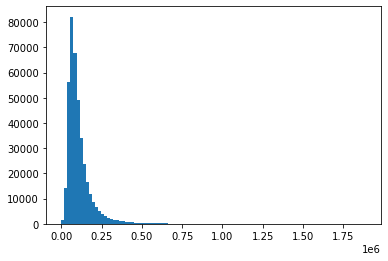

In [15]:

n, bins, patches = plt.hist(obj1_pt , 100)
plt.show()

### Separate this into "signal" and "background" contributions by using the processID and the DataFrame filtering 

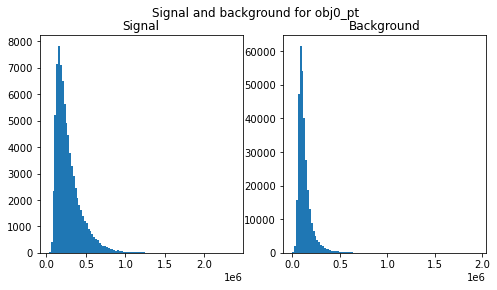

In [44]:

def plot_kinematic_variable(df, ObjectID, variable):
    background = df[df['ProcessID'] == 0]
    signal = df[df['ProcessID'] == 1]

    fig, ax = plt.subplots(1,2)
    fig.suptitle("Signal and background for obj{i}_{var}".format(i = ObjectID,
                                                              var = variable))
    fig.set_figwidth(8)

    ax[0].set_title("Signal")
    _,_,_ = ax[0].hist(signal["obj{i}_{var}".format(i = ObjectID,
                                                    var = variable)].astype(float),
                       bins=100)

    ax[1].set_title("Background")
    _,_,_ = ax[1].hist(background["obj{i}_{var}".format(i = ObjectID,
                                                        var = variable)].astype(float),
                       bins=100)
    
    return background, signal
    
background, signal = plot_kinematic_variable(df, 0, "pt")

In [57]:
background_mean = background["obj0_pt"].astype(float).to_numpy().mean()
print(background_mean)

128641.45924156251


In [56]:
signal_mean = signal["obj0_pt"].astype(float).to_numpy().mean()
print(signal_mean)

279337.18745875


In [71]:
cutoff = (background_mean + signal_mean) / 2


21

0.8576883721484374

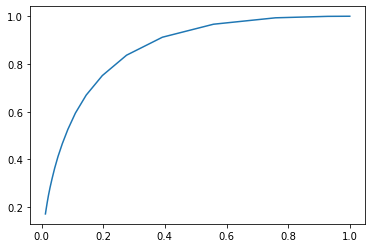

In [100]:
# signal = 1, background = 0
# signal > cutof, background < cutof
def calc_roc_curve(df, cutoff):
    x = df['obj0_pt'].astype(float).to_numpy()
    y_true = df['ProcessID'].to_numpy()
    
    cutoffs = [(i/10)*cutoff for i in range(0,21) ]
    
    results = []
    
    for c in cutoffs:
        y_pred = np.zeros_like(y_true)
        y_pred[x > c] = 1
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        sens = tp / (tp + fn) # how many of the positives found
        spec = tn / (tn + fp) # how many of the negatives found
        results.append((sens, 1-spec))
    return results
        
roc_values = calc_roc_curve(df, cutoff)
roc_values = np.array(roc_values)
y = roc_values[:,0]
x = roc_values[:,1]
plt.plot(x, y)
auc(x, y)

In [102]:
x = df['obj0_pt'].astype(float).to_numpy()
y_true = df['ProcessID'].to_numpy()
y_pred = np.zeros_like(y_true)
y_pred[x > 0.5 * cutoff] = 1

y_true = df['ProcessID'].to_numpy()

fpr, tpr, thresholds = roc_curve(y_true, y_pred, drop_intermediate=False)

thresholds

array([2, 1, 0])